In [1]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

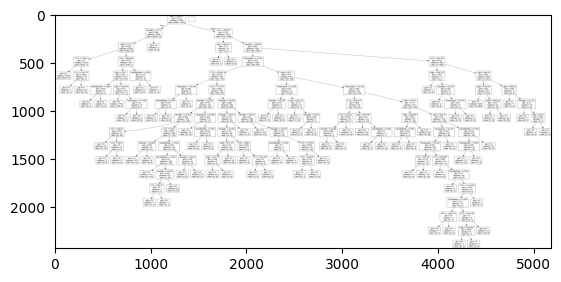

In [3]:
# load Occupancy Data

room1 = pd.read_csv("../Files/datatest.txt", sep = ',', header = 0)
room2 = pd.read_csv("../Files/datatraining.txt", sep = ',', header = 0)
room = pd.concat([room1, room2])
features = ['Light', 'CO2', 'Temperature', 'HumidityRatio', 'Humidity']
X = room[features]
y = room['Occupancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)
dtree = DecisionTreeClassifier(random_state=0)
dtree = dtree.fit(X_train, y_train)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [4]:
# Print decision tree digraph (saved as data in the cell above)
print(data)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Light <= 369.875\ngini = 0.373\nsamples = 7565\nvalue = [5687, 1878]"] ;
1 [label="Humidity <= 37.74\ngini = 0.004\nsamples = 5592\nvalue = [5582, 10]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Light <= 212.5\ngini = 0.003\nsamples = 5590\nvalue = [5582, 8]"] ;
1 -> 2 ;
3 [label="CO2 <= 1244.5\ngini = 0.0\nsamples = 5403\nvalue = [5402, 1]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 5359\nvalue = [5359, 0]"] ;
3 -> 4 ;
5 [label="CO2 <= 1247.75\ngini = 0.044\nsamples = 44\nvalue = [43, 1]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 43\nvalue = [43, 0]"] ;
5 -> 7 ;
8 [label="CO2 <= 469.208\ngini = 0.072\nsamples = 187\nvalue = [180, 7]"] ;
2 -> 8 ;
9 [label="Light <= 218.1\ngini = 0.022\nsamples = 181\nvalue = [179, 2]"] ;
8 -> 9 ;
10 [label="HumidityRatio <= 0.004\ngini = 0.444\nsamples = 3\nvalu

In [5]:
y_pred = dtree.predict(X_test)

In [6]:
# Print confusion matric and classification report 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2407   13]
 [  14  809]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2420
           1       0.98      0.98      0.98       823

    accuracy                           0.99      3243
   macro avg       0.99      0.99      0.99      3243
weighted avg       0.99      0.99      0.99      3243



In [7]:
# StandardScaler is used to remove the outliners

std_slc = StandardScaler()
pca = decomposition.PCA()
dtree2 = tree.DecisionTreeClassifier()

In [8]:
# Create pipeline to pass multuple parameters to gridsearch

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dtree2)])

In [9]:
# PCA reduces the dimension of features
n_components = list(range(1,X.shape[1]+1,1))


In [10]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12,24,48]

In [11]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [12]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12, 24, 48],
                         'pca__n_components': [1, 2, 3, 4, 5]})

In [13]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 4
Best Number Of Components: 5

DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [ ]:
# dtree = DecisionTreeClassifier(random_state=0, max_depth= 5)
# dtree = DecisionTreeClassifier(random_state=0, max_depth= 15)
# dtree = DecisionTreeClassifier(random_state=0,min_samples_leaf= 200)
# dtree = DecisionTreeClassifier(random_state=0,min_samples_leaf= 425)